In [1]:
# Title: MTD-SplitMerge Processing Script
# Author: Hooman Ayat
# Email: hooman.ayat86@gmail.com
# Date Created: 2024-10-18
# Last Modified: 2024-10-18

# Description:
# Step 1 ConvolutionProcessor: Create Convolved Maps in Separate Files
# - Separate the inputs into multiple files, each of which should have one timestep. However, the sperated files should have time dimension. 
# - Note: This is a prepropeccsing step that you may have to this yourself!

# Step 2 MergerProcessor: Merge the Convolved Maps
# - After creating the convolved maps, merge them all together.
# - Note: Merging is limited to each season in every year to avoid producing oversized files.

# Step 3 ObjectTrackerProcessor: Track Objects Using the Label Package
# - Run the label package on the merged outputs to track the objects.
# - The output will include two folders:
#   1) A folder containing the labeled merged outputs.
#   2) A folder with information regarding the splitting and merging of objects.

# Step 4 ObjectPropertiesProcessor: Calculate Object Properties
# - In this step, calculate properties of individual objects, such as area, shape, and intensity.

# Step 5 SystemPropertiesProcessor: Calculate System Properties
# - In this step, calculate properties of the overall system, including velocity and direction.

# References:
# - https://link.springer.com/article/10.1007/s00382-022-06404-z
# - https://journals.ametsoc.org/view/journals/hydr/22/1/jhm-d-20-0187.1.xml
# - https://www.science.org/doi/abs/10.1126/science.abn8657

# If you have any questions, please contact me at: hooman.ayat86@gmail.com


In [1]:
# Step 1 ConvolutionProcessor:
import os
current_dir = os.getcwd()
from MTD.obj_convolution import ConvolutionProcessor

input_folder = current_dir + r'\MRMS-Sample_data\inputs'
output_convolved_folder = current_dir + r'\MRMS-Sample_data\outputs\convolved_maps'
input_raster_main_field = 'PrecipRate_0mabovemeansealevel'
input_raster_time_field = 'time'
R=3
Th=0.1

processor = ConvolutionProcessor(
    input_folder = input_folder,
    output_folder = output_convolved_folder,
    input_raster_main_field = input_raster_main_field,
    input_raster_time_field = input_raster_time_field,
    R=3,
    Th=0.1
)
processor.run()

Processing file: C:\Users\h.ayat\Desktop\Object_tracking\MRMS-Sample_data\inputs\PrecipRate_00.00_20141101-153000_double_double.nc
Saved convolved file to: C:\Users\h.ayat\Desktop\Object_tracking\MRMS-Sample_data\outputs\convolved_maps\convolved_20141101T1502.nc
Processing file: C:\Users\h.ayat\Desktop\Object_tracking\MRMS-Sample_data\inputs\PrecipRate_00.00_20141101-160000_double_double.nc
Saved convolved file to: C:\Users\h.ayat\Desktop\Object_tracking\MRMS-Sample_data\outputs\convolved_maps\convolved_20141101T1532.nc
Processing file: C:\Users\h.ayat\Desktop\Object_tracking\MRMS-Sample_data\inputs\PrecipRate_00.00_20141101-163000_double_double.nc
Saved convolved file to: C:\Users\h.ayat\Desktop\Object_tracking\MRMS-Sample_data\outputs\convolved_maps\convolved_20141101T1602.nc
Processing file: C:\Users\h.ayat\Desktop\Object_tracking\MRMS-Sample_data\inputs\PrecipRate_00.00_20141101-233000_double_double.nc
Saved convolved file to: C:\Users\h.ayat\Desktop\Object_tracking\MRMS-Sample_dat

In [1]:
# Step 2 MergerProcessor:
import os
current_dir = os.getcwd()
from MTD.obj_merging import MergerProcessor
output_convolved_folder = current_dir + r'\MRMS-Sample_data\outputs\convolved_maps'
output_merged_maps_folder_address = current_dir + r'\MRMS-Sample_data\outputs\merged_convolved_maps'
input_covolved_maps_folder_address = output_convolved_folder
processor = MergerProcessor(input_covolved_maps_folder_address, output_merged_maps_folder_address, 2)
processor.merge_files_by_season_and_year()


Year: 2014
	DJF 2014
	MAM 2014
	JJA 2014
	SON 2014
Saving file: C:\Users\h.ayat\Desktop\Object_tracking\MRMS-Sample_data\outputs\merged_convolved_maps\20141101_1502_20141101_1602.nc


c:\Users\h.ayat\Desktop\Object_tracking\MTD\obj_merging.py:155: UserWarning: Times can't be serialized faithfully to int64 with requested units 'days since 2014-11-01T15:02:00'. Serializing with units 'minutes since 2014-11-01T15:02:00' instead. Set encoding['dtype'] to floating point dtype to serialize with units 'days since 2014-11-01T15:02:00'. Set encoding['units'] to 'minutes since 2014-11-01T15:02:00' to silence this warning .
  ds_list[m].to_netcdf(output_file, encoding = self.compress_enchoding(ds_list[m]))


Saving file: C:\Users\h.ayat\Desktop\Object_tracking\MRMS-Sample_data\outputs\merged_convolved_maps\20141101_2302_20141102_0402.nc


c:\Users\h.ayat\Desktop\Object_tracking\MTD\obj_merging.py:155: UserWarning: Times can't be serialized faithfully to int64 with requested units 'days since 2014-11-01T15:02:00'. Serializing with units 'minutes since 2014-11-01T15:02:00' instead. Set encoding['dtype'] to floating point dtype to serialize with units 'days since 2014-11-01T15:02:00'. Set encoding['units'] to 'minutes since 2014-11-01T15:02:00' to silence this warning .
  ds_list[m].to_netcdf(output_file, encoding = self.compress_enchoding(ds_list[m]))


Saving file: C:\Users\h.ayat\Desktop\Object_tracking\MRMS-Sample_data\outputs\merged_convolved_maps\20141103_1204_20141103_1204.nc


c:\Users\h.ayat\Desktop\Object_tracking\MTD\obj_merging.py:155: UserWarning: Times can't be serialized faithfully to int64 with requested units 'days since 2014-11-01T15:02:00'. Serializing with units 'minutes since 2014-11-01T15:02:00' instead. Set encoding['dtype'] to floating point dtype to serialize with units 'days since 2014-11-01T15:02:00'. Set encoding['units'] to 'minutes since 2014-11-01T15:02:00' to silence this warning .
  ds_list[m].to_netcdf(output_file, encoding = self.compress_enchoding(ds_list[m]))


Saving file: C:\Users\h.ayat\Desktop\Object_tracking\MRMS-Sample_data\outputs\merged_convolved_maps\20141103_2002_20141104_0232.nc


c:\Users\h.ayat\Desktop\Object_tracking\MTD\obj_merging.py:155: UserWarning: Times can't be serialized faithfully to int64 with requested units 'days since 2014-11-01T15:02:00'. Serializing with units 'minutes since 2014-11-01T15:02:00' instead. Set encoding['dtype'] to floating point dtype to serialize with units 'days since 2014-11-01T15:02:00'. Set encoding['units'] to 'minutes since 2014-11-01T15:02:00' to silence this warning .
  ds_list[m].to_netcdf(output_file, encoding = self.compress_enchoding(ds_list[m]))


In [2]:
# Step 3 ObjectTrackerProcessor:
import os
current_dir = os.getcwd()
from MTD.obj_saving_trakced import ObjectTrackerProcessor
output_merged_maps_folder_address = current_dir + r'\MRMS-Sample_data\outputs\merged_convolved_maps'
output_merged_maps_tracked_folder_address = current_dir + r'\MRMS-Sample_data\outputs\merged_convolved_maps_tracked'
connections_folder = current_dir + r'\MRMS-Sample_data\outputs\connections_folder'
processor = ObjectTrackerProcessor(output_merged_maps_folder_address, output_merged_maps_tracked_folder_address, connections_folder)
processor.process_files()

20141101_1502_20141101_1602.nc
20141101_2302_20141102_0402.nc
20141103_1204_20141103_1204.nc
20141103_2002_20141104_0232.nc


In [2]:
# Step 4 ObjectPropertiesProcessor:
import os
current_dir = os.getcwd()
from pathlib import Path
from MTD.obj_object_analysis import ObjectPropertiesProcessor
output_merged_maps_tracked_folder_address = current_dir + r'\MRMS-Sample_data\outputs\merged_convolved_maps_tracked'
output_folder_snapshots = current_dir + r'\MRMS-Sample_data\outputs\objects\snapshot_properties'
output_folder_averages = current_dir + r'\MRMS-Sample_data\outputs\objects\averaged_properties'
smaple_raw_data_address = Path(current_dir + r'\MRMS-Sample_data\inputs\PrecipRate_00.00_20141101-153000_double_double.nc')
input_raster_main_field = 'PrecipRate_0mabovemeansealevel'
processor = ObjectPropertiesProcessor(
    merged_folder=output_merged_maps_tracked_folder_address,
    output_folder_snapshots=output_folder_snapshots,
    output_folder_averages=output_folder_averages,
    smaple_raw_data_address = smaple_raw_data_address,
    input_raster_main_field = input_raster_main_field,
    area_threshold=1,
    pixel_resolution=10,
    time_resolution=30
)
Radar_data_obj_list, Radar_data_ave_list = processor.process_files()


20141101_1502_20141101_1602.nc
SON
20141101_2302_20141102_0402.nc
SON


ArrowTypeError: ('Did not pass numpy.dtype object', 'Conversion failed for column index with type int64')

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
image = xr.open_dataset(r"C:\Users\h.ayat\Desktop\Object_tracking\MRMS-Sample_data\outputs\merged_convolved_maps_tracked\20141103_2002_20141104_0232.nc")

np.max(image.fcst_object_id*image.fcst_raw)
# plt.imshow(image)
# np.unique(image)

<xarray.DataArray ()> Size: 8B
array(5687463.7199707)

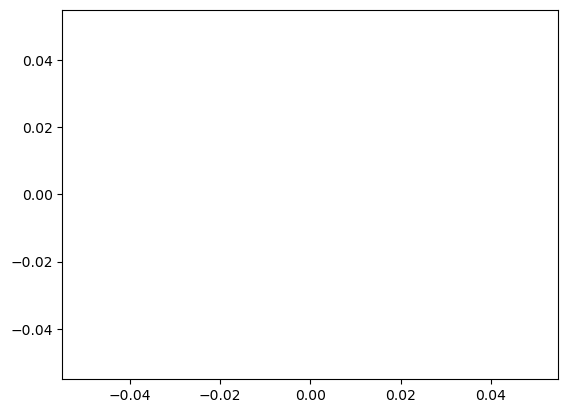

In [8]:
import pandas as pd
import numpy as np
data = pd.read_feather(r"MRMS-Sample_data\outputs\objects\averaged_properties\Radar_data_ave_0.ftr")
y = data.Ismax.values
x = np.arange(len(data))
import matplotlib.pyplot as plt 

plt.plot(x, y)

In [4]:
# Step 5 SystemPropertiesProcessor:
import os
current_dir = os.getcwd()
from MTD.obj_system_analysis import SystemPropertiesProcessor
output_folder_snapshots = current_dir + r'\MRMS-Sample_data\outputs\Objects\snapshot_properties'
output_folder_averages = current_dir + r'\MRMS-Sample_data\outputs\Objects\averaged_properties'
output_path = current_dir + r'\MRMS-Sample_data\outputs\systems'
connection_path = current_dir + r'\MRMS-Sample_data\outputs\connections_folder'
processor = SystemPropertiesProcessor(output_folder_snapshots,
                                      output_folder_averages,
                                      output_path,
                                      connection_path)
processor.run_analysis()


SON Creating Graphs: 10000
SON Creating Graphs: 20000
SON analysing groups: 1000 from 3995
SON analysing groups: 2000 from 3995
SON analysing groups: 3000 from 3995
